In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import optimize

#### A Production Problem, Profit maximization

Objective: $$\max_{x_1,x_2} Z = 3 x_1 + 2 x_2$$

s.t.

Production capacity for Product A: $$x_1 \leq 4$$
Production capacity for Product B: $$x_2 \leq 6$$
Labor hours constraint: $$2x_1 + 3x_2 \leq 18$$
Non-negativity constraints: $$ x_1 \geq 0, x_2 \geq 0$$

objective: $$Z = 3 x_1 + 2 x_2$$

s.t.

$$x_1 + 0 x_2 \leq 4$$
$$0 x_1 + x_2 \leq 6$$
$$2x_1 + 3x_2 \leq 18$$
$$ x_1 \geq 0, x_2 \geq 0$$

objective: \begin{pmatrix} 3 & 2 \end{pmatrix}
s.t.
$$\begin{pmatrix} 1 & 0 \\ 0 & 1 \\ 2 & 3 \end{pmatrix} \begin{pmatrix} x_1 & x_2 \end{pmatrix} \leq \begin{pmatrix} 4 \\ 6 \\ 18\end{pmatrix}$$

In [2]:
from scipy.optimize import minimize

# Coefficients of the objective function to be minimized
c = [3, 2]  # Objective function coefficients

# Define the inequality constraints
constraints = ({'type': 'ineq', 'fun': lambda x: 4 - x[0]},  # Production capacity for Product A
               {'type': 'ineq', 'fun': lambda x: 6 - x[1]},  # Production capacity for Product B
               {'type': 'ineq', 'fun': lambda x: 18 - (2*x[0] + 3*x[1])})  # Labor hours constraint

# Define the bounds for decision variables (x >= 0)
x_bounds = [(0, None), (0, None)]

# Set the initial guess
initial_guess = [0, 0]

# Define the objective function to be minimized (negative of the profit)
def objective_function(x):
    return -(c[0]*x[0] + c[1]*x[1])

# Solve the linear programming problem as a minimization problem
result = minimize(objective_function, initial_guess, constraints=constraints, bounds=x_bounds, method='SLSQP')

# Extract the optimal solution
optimal_product_A, optimal_product_B = result.x
max_profit = -result.fun  # Convert the minimization result to maximization

# Print the results
print(result)
print('-------------------------------')
print("Optimal Units of Product A:", optimal_product_A)
print("Optimal Units of Product B:", optimal_product_B)
print("Maximum Profit:", max_profit)


 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -18.666666666666735
       x: [ 4.000e+00  3.333e+00]
     nit: 3
     jac: [-3.000e+00 -2.000e+00]
    nfev: 9
    njev: 3
-------------------------------
Optimal Units of Product A: 4.000000000000005
Optimal Units of Product B: 3.3333333333333606
Maximum Profit: 18.666666666666735


Objective: 
$$\max E$$
s.t.
$$1800 \lambda_1 + 1000 \lambda_2 + 800 \lambda_3 + 900 \lambda_4 \geq 1800$$
$$200 \lambda_1 + 350 \lambda_2 + 450 \lambda_3 + 420 \lambda_4 \geq 200$$
$$1600 \lambda_1 + 1000 \lambda_2 + 1300 \lambda_3 + 1500 \lambda_4 \geq 1600$$
$$15 \lambda_1 + 20 \lambda_2 + 21 \lambda_3 + 20 \lambda_4 \leq 15E$$
$$140 \lambda_1 + 130 \lambda_2 + 120 \lambda_3 + 135 \lambda_4 \leq 140E$$
$$ \lambda_1 + \lambda_2 + \lambda_3 + \lambda_4 = 1$$

In [3]:
c = [0,0,0,0,1]

constraints = ({'type': 'ineq', 'fun': lambda x: 1800 - x[0]*1800 - x[1]*1000 - x[2]*800 - x[3]*900},
               {'type': 'ineq', 'fun': lambda x: 200 - x[0]*200 - x[1]*350 - x[2]*450 - x[3]*420}, 
               {'type': 'ineq', 'fun': lambda x: 1600 - x[0]*1600 - x[1]*1000 - x[2]*1300 - x[3]*1500},
               {'type': 'ineq', 'fun': lambda x: x[0]*15 + x[1]*20 + x[2]*21 + x[3]*20 - 15*x[4]},
               {'type': 'ineq', 'fun': lambda x: x[0]*140 + x[1]*130 + x[2]*120 + x[3]*135 - 140*x[4]},
               {'type': 'eq', 'fun': lambda x: x[0] + x[1] + x[2] + x[3] - 1}
              )
initial_guess = [1, 1, 1, 1, 1]

def objective_function(x):
    return -(c[-1]*x[4])

x_bounds = [(0, None), (0, None), (0, None), (0, None), (None, None)]

result = minimize(objective_function, initial_guess, bounds=x_bounds, constraints=constraints)

print(result)
print('-------------------------------')

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -1.0
       x: [ 1.000e+00  2.220e-16  0.000e+00  2.220e-16  1.000e+00]
     nit: 1
     jac: [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00 -1.000e+00]
    nfev: 7
    njev: 1
-------------------------------


### Data Envelope Analysis (DEA)

#### Input-oriented 2-input-1-output CRS DEA

In [4]:
d = {
    'q':[1.,2.,3.,1.,2.],
    'x1':[2.,2.,6.,3.,6.],
    'x2':[5.,4.,6.,2.,2.],
}
data = pd.DataFrame(d, index=range(1,6))
data

,q,x1,x2
1,1.0,2.0,5.0
2,2.0,2.0,4.0
3,3.0,6.0,6.0
4,1.0,3.0,2.0
5,2.0,6.0,2.0


For firm $i$, solve for:
$$ \min_{\theta, \boldsymbol{\lambda}} \theta$$
s.t.
$$-q_i+(q_1 \lambda_1 + q_2 \lambda_2 + q_3 \lambda_3 + q_4 \lambda_4 + q_5 \lambda_5) \geq 0$$
$$\theta x_{1i} - (x_{11} \lambda_1 + x_{12} \lambda_2 + x_{13} \lambda_3 + x_{14} \lambda_4 + x_{15} \lambda_5) \geq 0$$
$$\theta x_{2i} - (x_{21} \lambda_1 + x_{22} \lambda_2 + x_{23} \lambda_3 + x_{24} \lambda_4 + x_{25} \lambda_5) \geq 0$$
$$ \boldsymbol{\lambda} \geq 0 $$

or 

$$ \min_{\theta, \boldsymbol{\lambda}} \theta$$
s.t.
$$-q_i + \boldsymbol{Q} \boldsymbol{\lambda} \geq 0$$
$$\theta x_i - \boldsymbol{X} \boldsymbol{\lambda} \geq 0 $$
$$ \boldsymbol{\lambda} \geq 0 $$

For firm 1, solve for ...

In [5]:
c = [0,0,0,0,0,1]

constraints = ({'type': 'ineq', 'fun': lambda x: -1 + (1*x[0] + 2*x[1] + 3*x[2] + 1*x[3] + 2*x[4])},
               {'type': 'ineq', 'fun': lambda x: 2*x[5] - (2*x[0] + 2*x[1] + 6*x[2] + 3*x[3] + 6*x[4])},
               {'type': 'ineq', 'fun': lambda x: 5*x[5] - (5*x[0] + 4*x[1] + 6*x[2] + 2*x[3] + 2*x[4])},
              )
initial_guess = [0]*6

def objective_function(x):
    return x[5]

x_bounds = [(0, None), (0, None), (0, None), (0, None), (0, None), (None, None)]
result = minimize(objective_function, initial_guess, bounds=x_bounds, constraints=constraints)
print(result)
print('-----------------------------------------')
print('Technical efficiency score : ', result.fun)
print('lambdas: ', result.x[:5])

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.49999999999999845
       x: [ 8.743e-16  5.000e-01  0.000e+00  1.943e-16  0.000e+00
            5.000e-01]
     nit: 2
     jac: [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
            1.000e+00]
    nfev: 14
    njev: 2
-----------------------------------------
Technical efficiency score :  0.49999999999999845
lambdas:  [8.74300632e-16 5.00000000e-01 0.00000000e+00 1.94289029e-16
 0.00000000e+00]


In [6]:
for i in range(len(data)):
    q = data.q.values
    x1 = data.x1.values
    x2 = data.x2.values
    constraints = ({'type': 'ineq', 'fun': lambda x: -q[i] + (1*x[0] + 2*x[1] + 3*x[2] + 1*x[3] + 2*x[4])},
                   {'type': 'ineq', 'fun': lambda x: x1[i]*x[5] - (2*x[0] + 2*x[1] + 6*x[2] + 3*x[3] + 6*x[4])},
                   {'type': 'ineq', 'fun': lambda x: x2[i]*x[5] - (5*x[0] + 4*x[1] + 6*x[2] + 2*x[3] + 2*x[4])},
                  )
    initial_guess = [0]*6

    def objective_function(x):
        return x[5]

    x_bounds = [(0, None), (0, None), (0, None), (0, None), (0, None), (None, None)]
    result = minimize(objective_function, initial_guess, bounds=x_bounds, constraints=constraints)

    print('For firm {}'.format(i+1))
    print('Technical efficiency score : ', result.fun)
    print('lambdas: ', result.x[:5])
    print('-----------------------------------------')

For firm 1
Technical efficiency score :  0.49999999999999845
lambdas:  [8.74300632e-16 5.00000000e-01 0.00000000e+00 1.94289029e-16
 0.00000000e+00]
-----------------------------------------
For firm 2
Technical efficiency score :  1.0000000000000022
lambdas:  [0. 1. 0. 0. 0.]
-----------------------------------------
For firm 3
Technical efficiency score :  0.8333333333333289
lambdas:  [0.  1.  0.  0.  0.5]
-----------------------------------------
For firm 4
Technical efficiency score :  0.7142857142857153
lambdas:  [2.25726467e-16 2.14285714e-01 0.00000000e+00 0.00000000e+00
 2.85714286e-01]
-----------------------------------------
For firm 5
Technical efficiency score :  1.0000000000000022
lambdas:  [0.00000000e+00 1.99840144e-15 9.99200722e-16 1.16573418e-15
 1.00000000e+00]
-----------------------------------------


#### Input-oriented 1-input-1-output VRS DEA

In [7]:
d = {'q':[1,2,3,4,5],'x':[2,4,3,5,6]}
vrs_data = pd.DataFrame(d)
vrs_data

,q,x
0,1,2
1,2,4
2,3,3
3,4,5
4,5,6


In [8]:
for i in range(len(vrs_data)):
    q = vrs_data.q.values
    input = vrs_data.x.values
    constraints_vrs = ({'type': 'ineq', 'fun': lambda x: -q[i] + (1*x[0] + 2*x[1] + 3*x[2] + 4*x[3] + 5*x[4])},
                       {'type': 'ineq', 'fun': lambda x: input[i]*x[5] - (2*x[0] + 4*x[1] + 3*x[2] + 5*x[3] + 6*x[4])},
                       {'type': 'eq', 'fun': lambda x: x[0] + x[1] + x[2] + x[3] + x[4] - 1},
                      )
    constraints_crs = ({'type': 'ineq', 'fun': lambda x: -q[i] + (1*x[0] + 2*x[1] + 3*x[2] + 4*x[3] + 5*x[4])},
                       {'type': 'ineq', 'fun': lambda x: input[i]*x[5] - (2*x[0] + 4*x[1] + 3*x[2] + 5*x[3] + 6*x[4])},
                      )
    initial_guess = [0]*6
    def objective_function(x):
        return x[5]

    x_bounds = [(0, None), (0, None), (0, None), (0, None), (0, None), (None, None)]
    result_vrs = minimize(objective_function, initial_guess, bounds=x_bounds, constraints=constraints_vrs)
    result_crs = minimize(objective_function, initial_guess, bounds=x_bounds, constraints=constraints_crs)

    print('For firm {}'.format(i+1))
    print('VRS Technical efficiency score : ', result_vrs.fun)
    print('Scale efficiency: ', result_crs.fun/result_vrs.fun)
    print('lambdas: ', result_vrs.x[:5])
    print('-----------------------------------------')

For firm 1
VRS Technical efficiency score :  0.9999999999999989
Scale efficiency:  0.4999999999999999
lambdas:  [1.00000000e+00 5.55111512e-16 4.99600361e-16 0.00000000e+00
 2.77555756e-16]
-----------------------------------------
For firm 2
VRS Technical efficiency score :  0.6249999999999993
Scale efficiency:  0.7999999999999968
lambdas:  [5.00000000e-01 5.55111512e-17 5.00000000e-01 0.00000000e+00
 0.00000000e+00]
-----------------------------------------
For firm 3
VRS Technical efficiency score :  1.0000000000000009
Scale efficiency:  0.9999999999999951
lambdas:  [0.00000000e+00 1.66533454e-16 1.00000000e+00 0.00000000e+00
 2.08166817e-16]
-----------------------------------------
For firm 4
VRS Technical efficiency score :  0.9000000000000019
Scale efficiency:  0.8888888888888871
lambdas:  [6.20633538e-18 0.00000000e+00 5.00000000e-01 0.00000000e+00
 5.00000000e-01]
-----------------------------------------
For firm 5
VRS Technical efficiency score :  1.0000000000000013
Scale ef

#### Output-oriented 2-input-2-output VRS DEA

In [9]:
output_vrs_data = pd.DataFrame({'q1':[1,2,3,4,5], 'q2':[2,4,6,7,8], 'x1':[2,5,8,8,9], 'x2':[2,3,3,4,5]})
output_vrs_data

,q1,q2,x1,x2
0,1,2,2,2
1,2,4,5,3
2,3,6,8,3
3,4,7,8,4
4,5,8,9,5


For firm  $i$, solve for:

$$\max_{\phi, \boldsymbol{\lambda}} \phi$$
s.t.
$$ -\phi q_i + \boldsymbol{Q} \boldsymbol{\lambda} \geq 0 $$
$$ x_i - \boldsymbol{X} \boldsymbol{\lambda} \geq 0 $$
$$ \boldsymbol{I} \boldsymbol{\lambda} = 1$$
$$ \boldsymbol{\lambda} \geq 0 $$

In [10]:
for i in range(len(output_vrs_data)):

    q1 = output_vrs_data.q1.values
    q2 = output_vrs_data.q2.values
    x1 = output_vrs_data.x1.values
    x2 = output_vrs_data.x2.values
    constraints_vrs = ({'type': 'ineq', 'fun': lambda x: -q1[i]*x[5] + (1*x[0] + 2*x[1] + 3*x[2] + 4*x[3] + 5*x[4])},
                       {'type': 'ineq', 'fun': lambda x: -q2[i]*x[5] + (2*x[0] + 4*x[1] + 6*x[2] + 7*x[3] + 8*x[4])},
                       {'type': 'ineq', 'fun': lambda x: x1[i] - (2*x[0] + 5*x[1] + 8*x[2] + 8*x[3] + 9*x[4])},
                       {'type': 'ineq', 'fun': lambda x: x2[i] - (2*x[0] + 3*x[1] + 4*x[2] + 4*x[3] + 6*x[4])},
                       {'type': 'eq', 'fun': lambda x: x[0] + x[1] + x[2] + x[3] + x[4] - 1},
                      )
    initial_guess = [0]*6
    def objective_function(x):
        return -x[5]

    x_bounds = [(0, None), (0, None), (0, None), (0, None), (0, None), (1, None)]
    result_vrs = minimize(objective_function, initial_guess, bounds=x_bounds, constraints=constraints_vrs)
    print('For firm {}'.format(i+1))
    print('Technical efficiency score : ', -1/result_vrs.fun)
    print('lambdas: ', result_vrs.x[:5])
    print('-----------------------------------------')

For firm 1
Technical efficiency score :  1.0
lambdas:  [1.00000000e+00 2.38697950e-15 5.55111512e-17 1.66533454e-16
 0.00000000e+00]
-----------------------------------------
For firm 2
Technical efficiency score :  0.8888888888888896
lambdas:  [5.00000000e-01 0.00000000e+00 1.82145965e-16 5.00000000e-01
 7.81492926e-16]
-----------------------------------------
For firm 3
Technical efficiency score :  1.0
lambdas:  [1.66666667e-01 4.34652504e-14 3.03268261e-19 6.66666667e-01
 1.99875056e-19]
-----------------------------------------
For firm 4
Technical efficiency score :  0.9999999999999987
lambdas:  [9.99200722e-16 0.00000000e+00 2.77555756e-16 1.00000000e+00
 4.44089210e-16]
-----------------------------------------
For firm 5
Technical efficiency score :  0.9999999999999398
lambdas:  [1.14957479e-19 6.45625300e-15 1.49243412e-13 2.56005716e-13
 8.33333333e-01]
-----------------------------------------


#### CRS Input-oriented Cost Efficiency 2-input-1-output DEA

In [11]:
data['p1'] = 1
data['p2'] = 3
data['pq'] = 5
data

,q,x1,x2,p1,p2,pq
1,1.0,2.0,5.0,1,3,5
2,2.0,2.0,4.0,1,3,5
3,3.0,6.0,6.0,1,3,5
4,1.0,3.0,2.0,1,3,5
5,2.0,6.0,2.0,1,3,5


In [12]:
for i in range(len(data)):
    q = data.q.values
    x1 = data.x1.values
    x2 = data.x2.values

    constraints_crs = ({'type': 'ineq', 'fun': lambda x: -q[i] + (1*x[0] + 2*x[1] + 3*x[2] + 1*x[3] + 2*x[4])},
                       {'type': 'ineq', 'fun': lambda x: x1[i]*x[5] - (2*x[0] + 2*x[1] + 6*x[2] + 3*x[3] + 6*x[4])},
                       {'type': 'ineq', 'fun': lambda x: x2[i]*x[5] - (5*x[0] + 4*x[1] + 6*x[2] + 2*x[3] + 2*x[4])},
                      )
    initial_guess = [0]*6
    def objective_function(x):
        return x[5]
    x_bounds = [(0, None), (0, None), (0, None), (0, None), (0, None), (None, None)]
    result_crs = minimize(objective_function, initial_guess, bounds=x_bounds, constraints=constraints_crs)

    p1 = data.p1.values
    p2 = data.p2.values

    constraint_ce = ({'type': 'ineq', 'fun': lambda x: -q[i] + (1*x[0] + 2*x[1] + 3*x[2] + 1*x[3] + 2*x[4])},
                     {'type': 'ineq', 'fun': lambda x: x[5] - (2*x[0] + 2*x[1] + 6*x[2] + 3*x[3] + 6*x[4])},
                     {'type': 'ineq', 'fun': lambda x: x[6] - (5*x[0] + 4*x[1] + 6*x[2] + 2*x[3] + 2*x[4])},
                     # {'type': 'eq', 'fun': lambda x: x[0] + x[1] + x[2] + x[3] + x[4] - 1}
                    )
    initial_guess = [0]*7
    
    def objective_function_ce(x):
        return 1*x[5]+3*x[6]

    x_bounds_ce = [(0, None), (0, None), (0, None), (0, None), (0, None), (0, None), (0, None)]
    result_ce = minimize(objective_function_ce, initial_guess, bounds=x_bounds_ce, constraints=constraint_ce)
    total_cost = x1[i]*p1[i]+x2[i]*p2[i]

    # print(result_ce)
    print('For firm {}'.format(i+1))
    print('Technical efficiency score : ', np.round(result_crs.fun, 3))
    print('Cost efficiency score : ', np.round(result_ce.fun/total_cost,3))
    print('Allocative efficiency score: ', np.round((result_ce.fun/total_cost)/result_crs.fun, 3))
    print('-----------------------------------------')
    

For firm 1
Technical efficiency score :  0.5
Cost efficiency score :  0.353
Allocative efficiency score:  0.706
-----------------------------------------
For firm 2
Technical efficiency score :  1.0
Cost efficiency score :  0.857
Allocative efficiency score:  0.857
-----------------------------------------
For firm 3
Technical efficiency score :  0.833
Cost efficiency score :  0.75
Allocative efficiency score:  0.9
-----------------------------------------
For firm 4
Technical efficiency score :  0.714
Cost efficiency score :  0.667
Allocative efficiency score:  0.933
-----------------------------------------
For firm 5
Technical efficiency score :  1.0
Cost efficiency score :  1.0
Allocative efficiency score:  1.0
-----------------------------------------


#### Radial Directional Distance Function

Estimation of radial DDF:

$$D_r(x,y,b;g) = \sup{\beta: ((x,y,b) + \beta g) \in T} $$

To solve:

$$D_r(x,y,b;g) = \max_{\beta, \boldsymbol{\lambda}} \beta$$
s.t.
$$\sum^J_{j=1} \lambda_j \boldsymbol{x_j} \leq \boldsymbol{x} + \beta \boldsymbol{g_x}$$
$$\sum^J_{j=1} \lambda_j \boldsymbol{y_j} \geq \boldsymbol{y} + \beta \boldsymbol{g_y}$$
$$\sum^J_{j=1} \lambda_j \boldsymbol{b_j} = \boldsymbol{b} + \beta \boldsymbol{g_b}$$
$$ \lambda_j \geq 0, j = 1,..., J$$

In [13]:
data_ddf = pd.read_excel("pulp_paper.xls", sheet_name='Sheet1')
data_ddf

,Ftg,AR,Y,K,L,EL,FUEL,P,Q,W,PEL,PF,TOTCOST,TOTCO2,CO2TAX
0,1,2004,7.452912e+05,5.094031e+05,198,109537,1.236465e+06,1.185,0.116365,393.001862,0.237846,0.012597,124597.460938,4.693251e+05,0.011544
1,2,2004,3.488178e+05,2.472034e+05,256,6411,1.451397e+04,1.185,0.116365,337.015686,0.277346,0.187228,90929.234375,4.050820e+03,0.191100
2,3,2004,2.624678e+06,2.225683e+06,1146,734174,3.067905e+06,1.185,0.116365,400.018829,0.123944,0.013889,620033.750000,1.137468e+06,0.013029
3,4,2004,3.311249e+05,7.859141e+05,205,88457,3.249151e+05,1.185,0.116365,320.071625,0.222627,0.058469,109725.718750,1.184901e+05,0.008649
4,5,2004,7.899139e+05,5.692852e+05,449,135885,1.542048e+05,1.185,0.116365,290.792542,0.169947,0.175008,185751.781250,4.301324e+04,0.177971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,60,2004,8.422954e+04,3.231104e+04,44,1462,2.417800e+02,1.185,0.116365,360.916260,0.412025,0.514938,16871.113281,6.101737e+01,0.086601
60,61,2004,2.823063e+05,1.045636e+05,219,5938,9.925920e+03,1.185,0.116365,312.069794,0.304837,0.270841,74683.125000,4.019200e+02,0.161887
61,63,2004,2.805614e+06,1.466833e+06,725,1725775,5.193610e+05,1.185,0.116365,388.148407,0.168046,0.080200,629103.437500,1.661498e+05,0.060876
62,64,2004,1.294477e+06,7.253778e+05,376,322198,1.703318e+06,1.185,0.116365,375.343414,0.178014,0.021808,246547.578125,6.182020e+05,0.019971


In [14]:
data_ddf = data_ddf/data_ddf.mean()
data_ddf

,Ftg,AR,Y,K,L,EL,FUEL,P,Q,W,PEL,PF,TOTCOST,TOTCO2,CO2TAX
0,0.030814,1.0,0.837451,0.745557,0.587183,0.387327,2.032756,1.0,1.0,1.116026,0.969002,0.068557,0.621309,2.180304,0.115389
1,0.061627,1.0,0.391951,0.361804,0.759186,0.022670,0.023861,1.0,1.0,0.957039,1.129927,1.018984,0.453421,0.018819,1.910078
2,0.092441,1.0,2.949234,3.257486,3.398545,2.596066,5.043656,1.0,1.0,1.135952,0.504958,0.075588,3.091816,5.284241,0.130229
3,0.123255,1.0,0.372070,1.150255,0.607942,0.312787,0.534163,1.0,1.0,0.908923,0.906998,0.318214,0.547150,0.550459,0.086447
4,0.154068,1.0,0.887591,0.833200,1.331542,0.480494,0.253514,1.0,1.0,0.825777,0.692376,0.952478,0.926256,0.199823,1.778848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,1.848820,1.0,0.094645,0.047290,0.130485,0.005170,0.000397,1.0,1.0,1.024911,1.678618,2.802543,0.084128,0.000283,0.865590
60,1.879634,1.0,0.317215,0.153038,0.649460,0.020997,0.016318,1.0,1.0,0.886199,1.241928,1.474046,0.372409,0.001867,1.618092
61,1.941261,1.0,3.152544,2.146841,2.150039,6.102402,0.853833,1.0,1.0,1.102243,0.684633,0.436489,3.137042,0.771868,0.608465
62,1.972075,1.0,1.454546,1.061655,1.115055,1.139304,2.800265,1.0,1.0,1.065881,0.725243,0.118688,1.229416,2.871928,0.199610


In [15]:
ddf = []
for i in range(len(data_ddf)):
    # output
    y = data_ddf.Y.values
    # input
    k = data_ddf.K.values
    l = data_ddf.L.values
    el = data_ddf.EL.values
    fuel = data_ddf.FUEL.values
    # bad output
    co2 = data_ddf.TOTCO2.values

    def objective_function(x):
        return -x[0]

    # (g_x = -1, g_y = 1, g_b = -1)
    constraints = (
                  {'type': 'ineq', 'fun': lambda x: k[i] - x[0] - k@x[1:]},
                  {'type': 'ineq', 'fun': lambda x: l[i] - x[0] - l@x[1:]},
                  {'type': 'ineq', 'fun': lambda x: el[i] - x[0] - el@x[1:]},
                  {'type': 'ineq', 'fun': lambda x: fuel[i] - x[0] - fuel@x[1:]},
                  {'type': 'ineq', 'fun': lambda x: y@x[1:] - y[i] - x[0]},
                  {'type': 'eq', 'fun': lambda x: co2@x[1:] - co2[i] + x[0]},
                 )
    initial_guess = [1]*65
    
    bound_list = []
    for j in range(len(data_ddf)):
        bound_list.append((0, None))
    beta = (0, None)
    bound_list = (beta,) + tuple(bound_list)
    
    result = minimize(objective_function, initial_guess, bounds=bound_list, constraints=constraints)
    # print(result)
    print('Distance: ', np.round(-result.fun,4))
    ddf.append(np.round(-result.fun,4))

Distance:  0.0
Distance:  0.0039
Distance:  0.6721
Distance:  0.1573
Distance:  0.1584
Distance:  0.183
Distance:  0.1722
Distance:  0.0548
Distance:  0.0852
Distance:  0.0226
Distance:  0.153
Distance:  0.1381
Distance:  0.1103
Distance:  0.0
Distance:  0.0901
Distance:  0.2351
Distance:  0.0055
Distance:  0.0961
Distance:  0.0045
Distance:  0.0
Distance:  0.0
Distance:  0.0
Distance:  0.0945
Distance:  0.0582
Distance:  0.0441
Distance:  0.1812
Distance:  0.1974
Distance:  0.0
Distance:  0.0045
Distance:  0.087
Distance:  0.0527
Distance:  0.0296
Distance:  0.0
Distance:  0.0
Distance:  0.0
Distance:  0.0047
Distance:  0.0271
Distance:  0.006
Distance:  0.0023
Distance:  0.0
Distance:  0.0065
Distance:  0.0
Distance:  0.0031
Distance:  0.1767
Distance:  0.0
Distance:  0.0061
Distance:  0.0
Distance:  0.0006
Distance:  0.0
Distance:  0.0
Distance:  0.0
Distance:  0.0
Distance:  0.0042
Distance:  0.0
Distance:  0.0
Distance:  0.0
Distance:  0.1983
Distance:  0.026
Distance:  0.0089
Dis

(array([45.,  7., 10.,  1.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([0.     , 0.06721, 0.13442, 0.20163, 0.26884, 0.33605, 0.40326,
        0.47047, 0.53768, 0.60489, 0.6721 ]),
 <BarContainer object of 10 artists>)

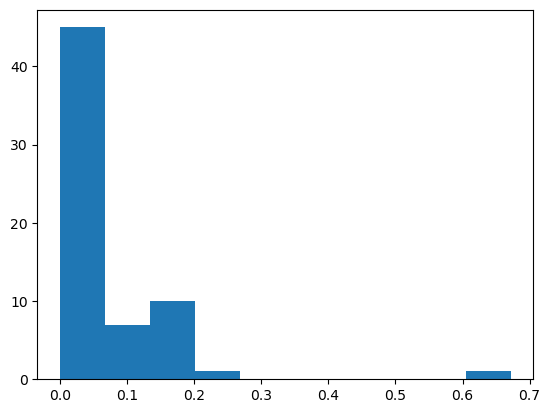

In [16]:
plt.hist(ddf, bins=10)